In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

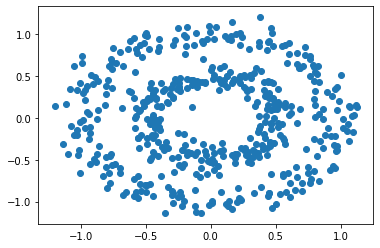

In [2]:
n  = 500 #numero de muestras
p = 2 #numero de circulos concentricos

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.09)#llamamos la funcion y

Y = Y[:, np.newaxis]

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
Y.shape

(500, 1)

In [4]:
X.shape

(500, 2)

In [5]:
class capa_neuronal():
    def __init__(self, entradaN, salidaN, activacion):
        self.activacion = activacion
        self.arranque = np.random.rand(1, salidaN) * 2 -1
        """
        genera numero random de 0 a 1, 
        mult por 2 para que fluctue de 0 a 2, y
        resta uno para que fluctue de -1 a 1
        """
        self.peso = np.random.rand(entradaN, salidaN) * 2 -1
    


Funcion sigmoidal

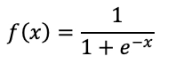

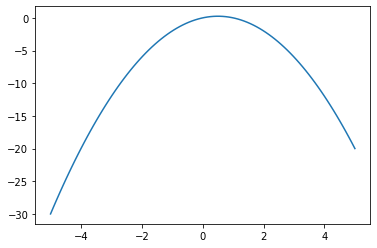

In [6]:
sigmoide = lambda x: 1 /(1 + np.e ** (-x)), lambda x: x * (1 - x)# sigmoide , derivada

relu = lambda x: np.maximum(0, x), 


_x = np.linspace(-5, 5, 100)
            
plt.plot(_x, sigmoide[1](_x))


In [7]:
capa0 = capa_neuronal(p, 4, sigmoide)
capa1 = capa_neuronal(4, 8, sigmoide)


def crear_capa(estructura, activacion):
    
    nn = []
    
    for C, capas in enumerate(estructura[:-1]):
    
        nn.append(capa_neuronal(estructura[C], estructura[C+1], activacion))
        
        
    return nn
        


In [8]:
estructura = [p, 4, 8, 1]

red_neuronal = crear_capa(estructura, sigmoide)

coste = (lambda prediccion, real: np.mean((prediccion - real) ** 2), lambda prediccion, real: (prediccion - real))
#calculo del error cuadratico medio y su derivada#

def entrenador(red_neuronal, X, Y, coste, lr=0.5, train=True):
    
    salida = [(None, X)]
    
    for C, capas in enumerate(red_neuronal):
        
    
        ponderada = salida[-1][1] @ red_neuronal[C].peso + red_neuronal[C].arranque
    
        activ = red_neuronal[C].activacion[0](ponderada)
        
        
        salida.append((ponderada, activ))
        
        
        
       
    if train:
        
        deltas = []
        
        for C in reversed(range (0, len(red_neuronal))):
            
            ponderada = salida[C+1][0]#ponderada de la capa anterior, primer valor en bruto de x
            activ = salida[C+1][1]#ponderada de la capa anterior, primer valor de activacion             
            
            if C == len(red_neuronal) - 1: #ultima capa#
                deltas.insert(0, coste[1](activ, Y) * red_neuronal[C].activacion[1](activ)) #error de ultima capa#
            else:
                deltas.insert(0, deltas[0] @ _peso.T * red_neuronal[C].activacion[1](activ)) 
                #error de la capa actual respecto al primer registro de la salida#
                
                
            _peso = red_neuronal[C].peso
            
        
            red_neuronal[C].arranque = red_neuronal[C].arranque - np.mean(deltas[0], axis=0, keepdims=True) * lr
            #Se reajusta el valor de arranque actual restandole la media del primer registro por el learning rate.
            
            
            red_neuronal[C].peso = red_neuronal[C].peso - salida[C][1].T @ deltas[0] * lr
            #se reajusta el valor de peso restandole la el producto matricial de la salida actual y el primer
            #registro de las deltas por el learning rate#
            
    return salida[-1][1]



    print(salida)          
          
            
        
entrenador(red_neuronal, X, Y, coste, 0.5)



array([[0.66133656],
       [0.66297206],
       [0.65692832],
       [0.65518092],
       [0.66245351],
       [0.6568528 ],
       [0.65484529],
       [0.66354079],
       [0.66525823],
       [0.66323949],
       [0.66204267],
       [0.65511605],
       [0.66657469],
       [0.66810728],
       [0.6580415 ],
       [0.66346609],
       [0.6575502 ],
       [0.65654477],
       [0.66088652],
       [0.65704831],
       [0.66698515],
       [0.6666379 ],
       [0.65732085],
       [0.66163731],
       [0.66123327],
       [0.65754871],
       [0.65810634],
       [0.65848379],
       [0.66178964],
       [0.66370654],
       [0.66709215],
       [0.65866122],
       [0.65480668],
       [0.66116127],
       [0.65565926],
       [0.66421832],
       [0.66035456],
       [0.66132902],
       [0.66038487],
       [0.66314406],
       [0.65585233],
       [0.66133699],
       [0.66370722],
       [0.65876425],
       [0.65647787],
       [0.65941159],
       [0.66564331],
       [0.660

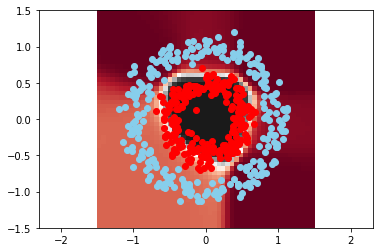

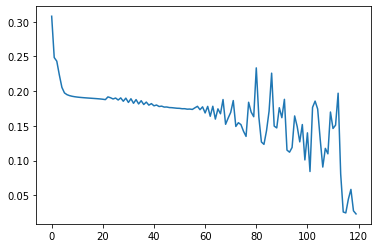

[0.3079358870698612, 0.24845913425981508, 0.24319920772814838, 0.22332104140312053, 0.20548992645105033, 0.19753115981394848, 0.19496222875115718, 0.1935749528345256, 0.1926630247474439, 0.19200837489335487, 0.19150862824040066, 0.19110669203565592, 0.19076716273185926, 0.1904671430670103, 0.19019128244388697, 0.18992837617242134, 0.18966885708806833, 0.18940258638516536, 0.18911623428797955, 0.18878927538751608, 0.188386898054797, 0.18784788992390383, 0.19175042850352003, 0.19057823494962547, 0.18876913731968248, 0.190124047582413, 0.18727521304870104, 0.19032565550913927, 0.18549070876858526, 0.18997469701128197, 0.18378420155549163, 0.18910819586337457, 0.18253461146180275, 0.18787030976807384, 0.18161415438167583, 0.18628609973775173, 0.1808000799921841, 0.18428575626262284, 0.17990390639018244, 0.18208035570703776, 0.1788979441191927, 0.1800593703323377, 0.1779278145706229, 0.17844328487841715, 0.17709943171728487, 0.17720388997477893, 0.17641194202642155, 0.17623090904957828, 0.1

In [11]:
import time
from IPython.display import clear_output

neural_n = crear_capa(estructura, sigmoide)

#se inicializa la red neuronal y se guarda en variable

loss = []


for l in range(3000):#ciclos de entrenamiento
        
        pY = entrenador(neural_n, X, Y, coste, lr=0.1)#el learning rate el tamaño de la variacion en los valores
                                                        #random del muestreo, donde 1 es igual a variacion 0
                                                            #a manor lr mayor tacto en el muestreo
        
        if l % 25 == 0:#
            
            loss.append(coste[0](pY, Y))
            
            res = 50
            
            _x0 = np.linspace(-1.5, 1.5, res)
            _x1 = np.linspace(-1.5, 1.5, res)
            
            
            _Y = np.zeros((res, res))
            
            for l0, x0 in enumerate (_x0):
                for l1, x1 in enumerate(_x1):
                    _Y[l0, l1] = entrenador(neural_n, np.array([[x0, x1]]), Y, coste, train=False)[0][0]
                    
                    
            plt.pcolormesh(_x0, _x1, _Y, cmap="RdGy")
            plt.axis("equal")
            
            plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
            plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="red")
            
            clear_output(wait=True)
            plt.show()
            plt.plot(range(len(loss)), loss)
            plt.show()
            time.sleep(0.3)
            print(loss)
            print(len(loss))
            